In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://upload.wikimedia.org/wikipedia/commons/4/43/Cute_dog.jpg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 248MB/s]

100%|██████████| 4.94M/4.94M [00:00<00:00, 30.8MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/Cute_dog.jpg: 448x640 1 dog, 131.5ms
Speed: 24.8ms preprocess, 131.5ms inference, 1203.8ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[1162.4944,  163.0706, 3114.9290, 2023.9161]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.8219], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([16.], device='cuda:0')

In [ ]:
!gdown '15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M'
!gdown '1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q'
!wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
!unzip -o wider_face_split.zip
!unzip -o WIDER_train.zip
!unzip -o WIDER_val.zip

Streaming output truncated to the last 5000 lines.
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_469.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_473.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_474.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_476.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_478.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sport

In [ ]:
import os
import cv2


def convert(image_base_path = "./WIDER_train/images/",ground_truth = "./wider_face_split/wider_face_train_bbx_gt.txt"):
    #image_base_path = "./WIDER_train/images/"
    with open(ground_truth, "r") as f:
        lines = f.readlines()

    image_count = 0
    face_cout = 0
    for i in lines:
        # One image
        if ".jpg" in i:
            img_path = i.split("\n")[0]

            # Read Image...
            img = cv2.imread(image_base_path + img_path)

            num_obj = lines[lines.index(i) + 1].split("\n")[0]
            face_cout += int(num_obj)

            bbox_line_start = lines.index(i) + 2
            bbox_line_end = bbox_line_start + int(num_obj)

            # Init relative bbox
            rel_bbox_list = []
            for j in range(bbox_line_start, bbox_line_end):
                bbox_list = lines[j].split("\n")[0]
                bbox_split = bbox_list.split(" ")

                # Absolute bbox
                x1 = int(bbox_split[0])
                y1 = int(bbox_split[1])
                w = int(bbox_split[2])
                h = int(bbox_split[3])

                # Relative bbox (YOLO Train)
                img_height = img.shape[0]
                img_width = img.shape[1]

                rel_cx = str(float((x1 + int(w/2)) / img_width))
                rel_cy = str(float((y1 + int(h/2)) / img_height))
                rel_w = str(float(w / img_width))
                rel_h = str(float(h / img_height))

                string_bbox = "0 " + rel_cx + " " + rel_cy + " " + rel_w + " " + rel_h
                rel_bbox_list.append(string_bbox)

                ## Visualization
                # cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (0,0,255), 2)
                # print("x1, y1, W, H ==> ", x1, y1, w, h)
            # print(" ")

            # Save yolo train image ("wider_0.jpg, wider_1.jpg ...")
            save_path = image_base_path[:-7] + "labels/"
            save_image_name = img_path.split(".")[0]
            img_dir = save_image_name.split("/")[0]
            os.makedirs(save_path + img_dir, exist_ok=True)
            # cv2.imwrite( save_path + save_image_name + ".jpg", img)
            with open(save_path + save_image_name + ".txt", "w") as f:
                for i in rel_bbox_list:
                    f.write(i + "\n")

            image_count += 1

            ## Visualization
            # cv2.imshow("test", img)
            # cv2.waitKey()
            # cv2.destroyAllWindows()

    # Total image, faces
    print("Total Image : ", image_count)
    print("Total face : ", face_cout)

In [ ]:
os.makedirs("./WIDER_val/labels/", exist_ok=True)
os.makedirs("./WIDER_train/labels/", exist_ok=True)
convert(image_base_path = "./WIDER_val/images/",ground_truth = "./wider_face_split/wider_face_val_bbx_gt.txt")
convert(image_base_path = "./WIDER_train/images/",ground_truth = "./wider_face_split/wider_face_train_bbx_gt.txt")

Total Image :  3226
Total face :  39708
Total Image :  12880
Total face :  159420


In [ ]:
data_yml_content = """
train: /content/WIDER_train/images
val: /content/WIDER_val/images

nc: 1
names: ['face']
"""

# Specify the file path
file_path = "data.yaml"

# Write the content to the file
with open(file_path, "w") as file:
    file.write(data_yml_content)

# Optionally, you can check the content of the file
with open(file_path, "r") as file:
    print(file.read())


train: /content/WIDER_train/images
val: /content/WIDER_val/images

nc: 1
names: ['face']



In [ ]:
results = model.train(data="data.yaml", epochs=10, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nm

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown '1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T'
!unzip -o WIDER_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_311.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_312.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_315.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_32.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_322.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_325.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_326.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_33.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_335.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_341.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_347.jpg  
  inflating: WIDER_test/images/44--Aerobics/44_Aerobics_Aerobics_44_354.jpg  
  inflating: WI

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=WIDER_test/images/11--Meeting save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_100.jpg: 480x640 16 faces, 70.7ms
image 2/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_1001.jpg: 640x512 4 faces, 71.0ms
image 3/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_1005.jpg: 640x448 1 face, 58.6ms
image 4/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_1008.jpg: 352x640 3 faces, 85.1ms
image 5/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_101.jpg: 480x640 13 faces, 6.7ms
image 6/163 /content/WIDER_test/images/11--Meeting/11_Meeting_Meeting_11_Meeting_Meeting_11_1032.jpg: 640x416 1 face, 61.2ms
image 7/163 /content/WIDER_t

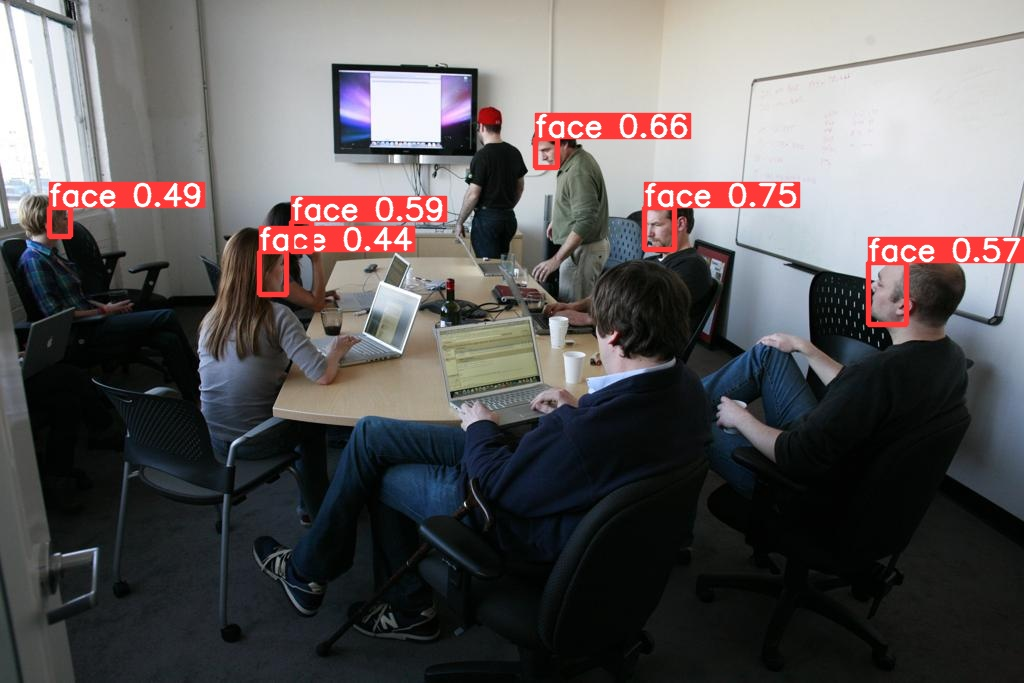

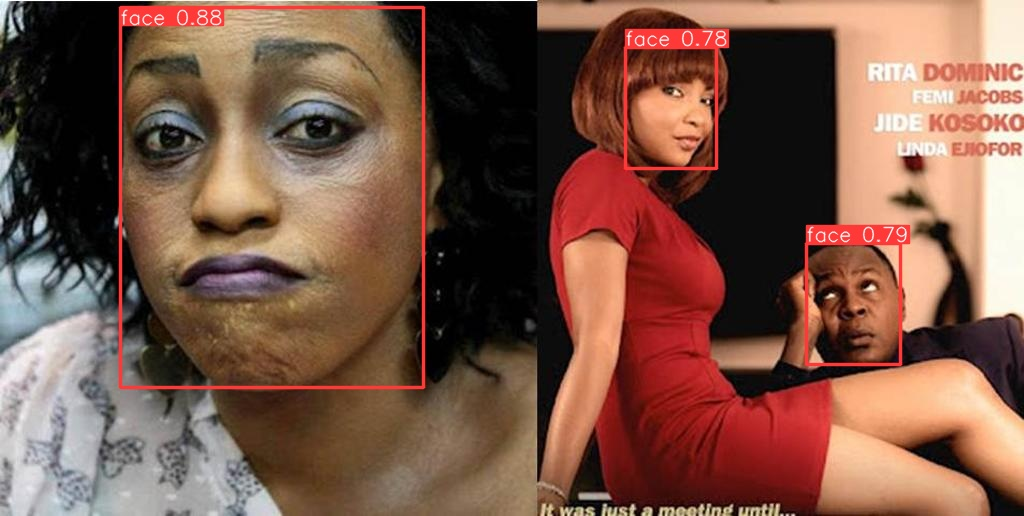

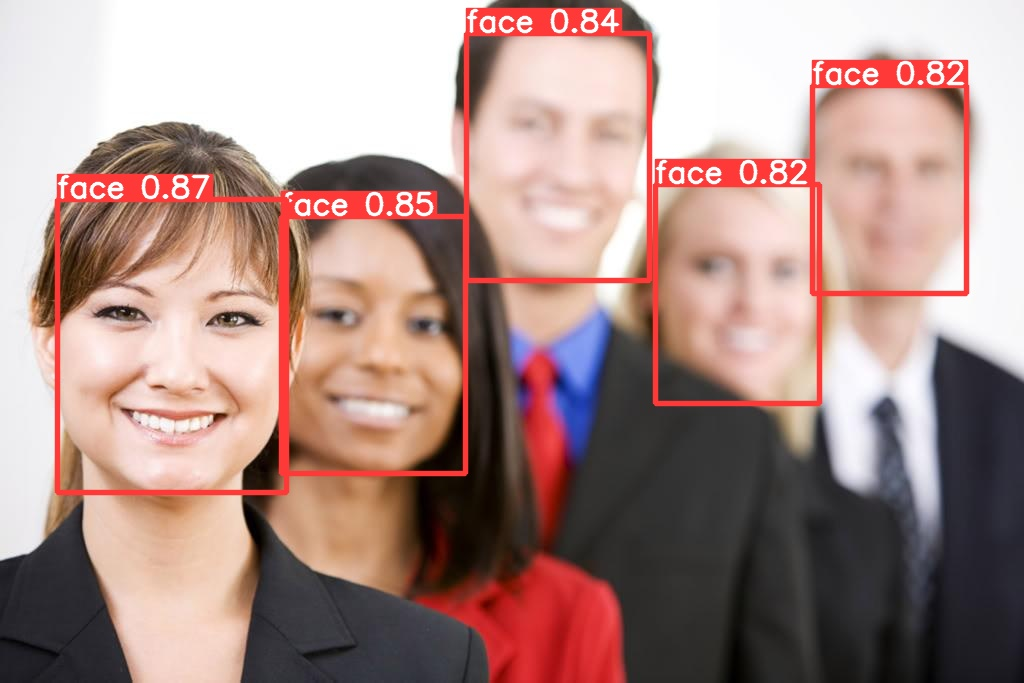

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 7%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 9%)
updating: content/runs/detect/train/weights/last.pt (deflated 9%)
updating: content/runs/detect/train/args.yaml (deflated 51%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 7%)
updating: content/runs/detect/train/results.png (deflated 8%)
updating: content/runs/detect/train/events.out.tfevents.1723263798.193db2adeb1d.880.0 (deflated 77%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 9%)
updating: content/runs/detect/train/F1_curve.png (deflated 19%)
updating: content/runs/detect/train/confusion_matrix_normalized.png (deflated 38%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 7%)
updating: content/runs/detect/t